In [19]:
import json
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from glob import glob
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"]})

In [2]:
methods = ['diffco', 'givengrad', 'bidiffco', 'fclgradfree']
keys = ['success', 'time', 'cnt_check', 'cost']
stats_by_method = {k: {m: [] for m in methods} for k in keys}

exps = ['2d_2dof_exp1', '2d_3dof_exp1', '2d_7dof_exp1']
for exp_name in exps:
    for fn in sorted(glob('../results/'+exp_name+'/*.json')):
        # if not '10obs' in fn:
        #     continue
        with open(fn, 'r') as f:
            r = json.load(f)
        for m in methods:
            if m not in r:
                continue
            for k in keys:
                stats_by_method[k][m].append(r[m][k])
for m in methods:
    for k in keys:
        if stats_by_method[k][m] == []:
            continue
        stats_by_method[k][m] = np.concatenate(stats_by_method[k][m])

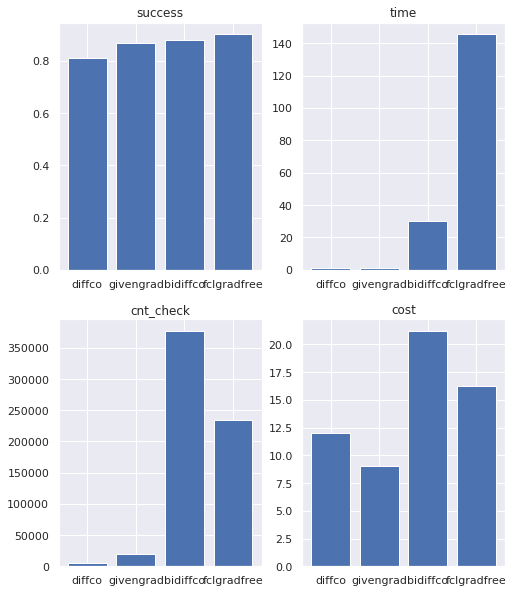

In [3]:
fig = plt.figure(figsize=(8, 10))
for i, k in enumerate(keys, 1):
    ax  = fig.add_subplot(2, len(keys)//2, i)
    ax.bar(methods, [np.mean(stats_by_method[k][m]) for m in methods])#, yerr=[np.std(stats_by_method[k][m]) for m in methods], capsize=10)
    ax.set_title(k)

plt.show()

In [4]:
stats_by_method.keys()

dict_keys(['success', 'time', 'cnt_check', 'cost'])

In [5]:
methods = ['diffco', 'givengrad', 'bidiffco', 'fclgradfree']
keys = ['success', 'time', 'cnt_check', 'cost']
obsnums = [1, 2, 5, 10, 20]
stats_by_obsnum = {k: {n: {m: [] for m in methods} for n in obsnums} for k in keys}

exps = ['2d_2dof_exp1', '2d_3dof_exp1', '2d_7dof_exp1']
for exp_name in exps:
    for n in obsnums:
        for fn in sorted(glob('../results/'+exp_name+'/*.json')):
            if not '{}obs'.format(n) in fn:
                continue
            with open(fn, 'r') as f:
                r = json.load(f)
            for m in methods:
                if m not in r:
                    continue
                for k in keys:
                    stats_by_obsnum[k][n][m].append(r[m][k])
for m in methods:
    for n in obsnums:
        for k in keys:
            if stats_by_obsnum[k][n][m] == []:
                continue
            stats_by_obsnum[k][n][m] = np.concatenate(stats_by_obsnum[k][n][m])

[11.28611635 12.58415157 11.74868956 11.2600647  10.51766336]
[0.03475978 0.07263076 0.02713376 0.15749257 0.07842713]
[42.97341745 49.17806968 47.58920049 35.25107341 43.05528583]

[8.20961582 8.59632978 7.63126245 6.83288942 7.08735356]
[0.03475221 0.07246567 0.02711706 0.15544562 0.07734151]
[48.09244233 42.14401935 35.14683948 33.18606507 42.32870187]

[ 8.30836429 11.89868147  8.30461409  7.10009938  8.13063117]
[0.03475221 0.07246567 0.02711706 0.0842782  0.07734152]
[ 58.84388049 486.577419   185.02322476  46.30243662  98.95165602]

[ 8.74725038 16.21710408  9.13094212  7.73176602  9.68900846]
[0.03475221 0.07246567 0.02711706 0.15544562 0.07734152]
[ 48.09244283 864.17709457 109.28450491  55.60400278  72.81758445]



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


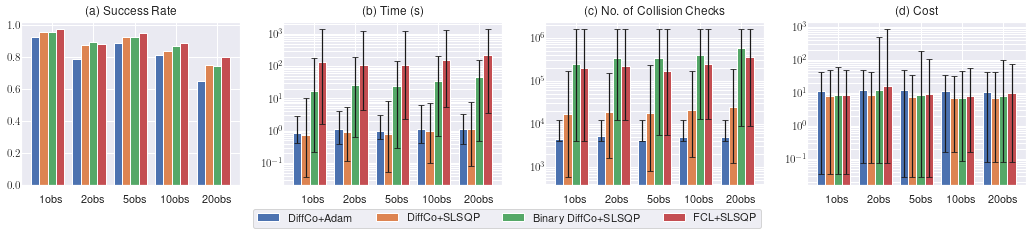

In [20]:
w = 0.3
x = np.arange(len(obsnums))*1.5
fig = plt.figure(figsize=(18, 3))
methods_labeltext = {
    'diffco': 'DiffCo+Adam',
    'givengrad': 'DiffCo+SLSQP',
    'bidiffco': 'Binary DiffCo+SLSQP',
    'fclgradfree': 'FCL+SLSQP',
}
keylabeltext = {
    'success': '(a) Success Rate',
    'time': '(b) Time (s)',
    'cnt_check': '(c) No. of Collision Checks',
    'cost': '(d) Cost'
}
for i, k in enumerate(keys, 1):
    ax = fig.add_subplot(1, len(keys), i)
    ax.grid(True, 'both')
    for itm, m in enumerate(methods):
        # print((stats_by_obsnum[k][n][m] == []))
        # ax.bar(x+itm*w, [np.mean(stats_by_obsnum[k][n][m] if k != 'cost' or stats_by_obsnum['success'][n][m] == [] else stats_by_obsnum[k][n][m][stats_by_obsnum['success'][n][m]]) for n in obsnums], width=w, yerr=None if k == 'success' else [np.std(stats_by_obsnum[k][n][m] if k != 'cost' or stats_by_obsnum['success'][n][m] == [] else stats_by_obsnum[k][n][m][stats_by_obsnum['success'][n][m]])/5 for n in obsnums], capsize=2, label=m)
        mean_val = np.array([np.mean(stats_by_obsnum[k][n][m] if k != 'cost' or stats_by_obsnum[k][n][m] is [] else stats_by_obsnum[k][n][m][stats_by_obsnum['success'][n][m]]) for n in obsnums])
        if stats_by_obsnum['success'][n][m] is not []:
            min_val = np.array([np.min(stats_by_obsnum[k][n][m] if k != 'cost' else stats_by_obsnum[k][n][m][stats_by_obsnum['success'][n][m]]) for n in obsnums])
            max_val = np.array([np.max(stats_by_obsnum[k][n][m] if k != 'cost' else stats_by_obsnum[k][n][m][stats_by_obsnum['success'][n][m]]) for n in obsnums])
            if k == 'cost':
                print(mean_val)
                print(min_val)
                print(max_val)
                print('')
        ax.bar(x+itm*w, mean_val, width=w, yerr=None if k == 'success' else (mean_val-min_val, max_val-mean_val), error_kw=dict(lw=1.2, capsize=3, capthick=0.8), label=methods_labeltext[m])
        
    ax.set_title(keylabeltext[k]) # labelpad=-5, loc='top')
    ax.set_xticks(x + len(methods)/2*w)
    ax.set_xticklabels(['{}obs'.format(n) for n in obsnums])
    ax.tick_params(axis='y', which='major', pad=-6)
    if k not in ['success']:
        ax.set_yscale('log')
    if i == len(keys):
        # ax.legend(bbox_to_anchor=(1.300, 1), loc="upper right", ncol=1, fontsize=5) #
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=len(keys), bbox_to_anchor=(0.5, -0.1),)
    

# plt.show()
plt.savefig('../figs/speed_compare/stats_by_obsnum.png', dpi=500)

In [7]:
import matplotlib as mpl
mpl.__version__

'3.3.2'

In [13]:
[1,2,3] is True

False